In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
ts = numpy.linspace(10, 40, 1000)
ω = 0.5
ϕ = -1

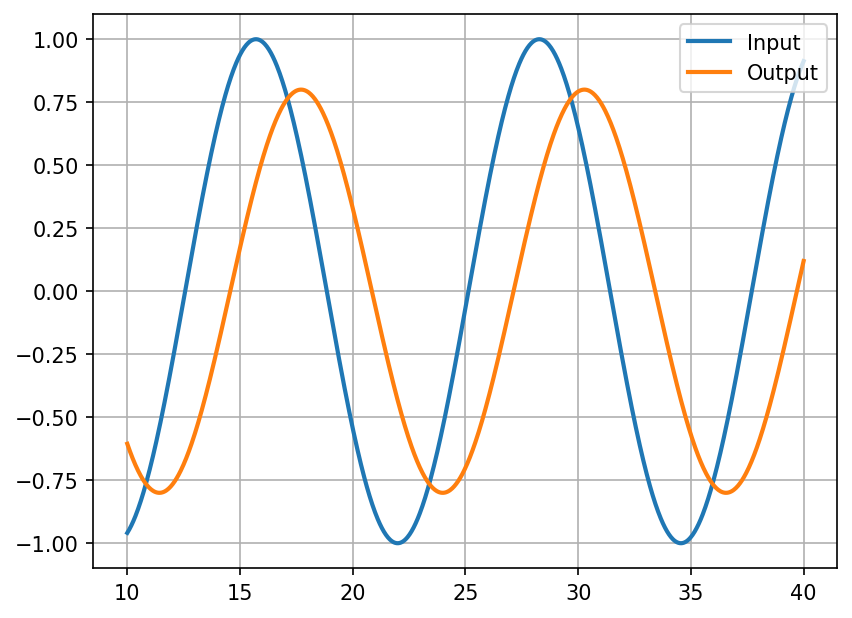

In [3]:
plt.plot(ts, numpy.sin(ts*ω), lw=2)
plt.plot(ts, 0.8*numpy.sin(ts*ω + ϕ), lw=2)
plt.legend(['Input', 'Output'])
plt.grid()
plt.savefig('twosines.png')

In [4]:
s = 1j*ω

In [5]:
def G(s):
    return numpy.exp(-2*s)/(2*s + 1)

In [6]:
import scipy.optimize

In [7]:
G(1j*ω)

(-0.15058433946987837-0.6908866453380181j)

In [8]:
omega = scipy.optimize.fsolve(lambda omega: G(1j*omega).real + 0.45, 1)

In [9]:
omega

array([0.99015365])

In [10]:
G(1j*omega)

array([-0.45-0.02617736j])

In [11]:
import control

In [12]:
G = control.tf(2, [0.5, 1])

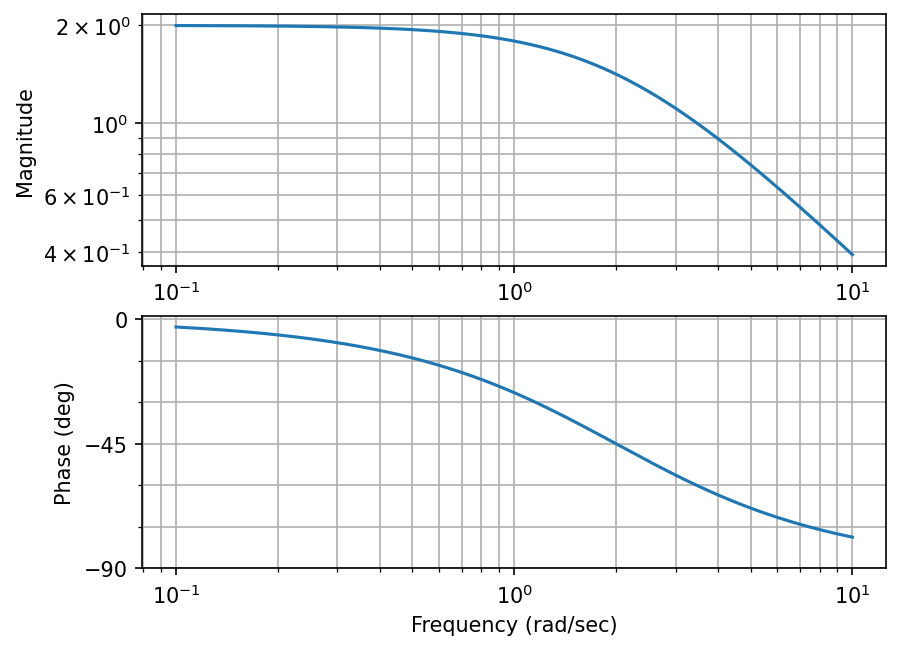

In [13]:
control.bode_plot(G)
plt.savefig('bode1.png')

In [14]:
s = control.tf([1, 0], 1)

In [15]:
G = 1*(1 + 1/s + s)

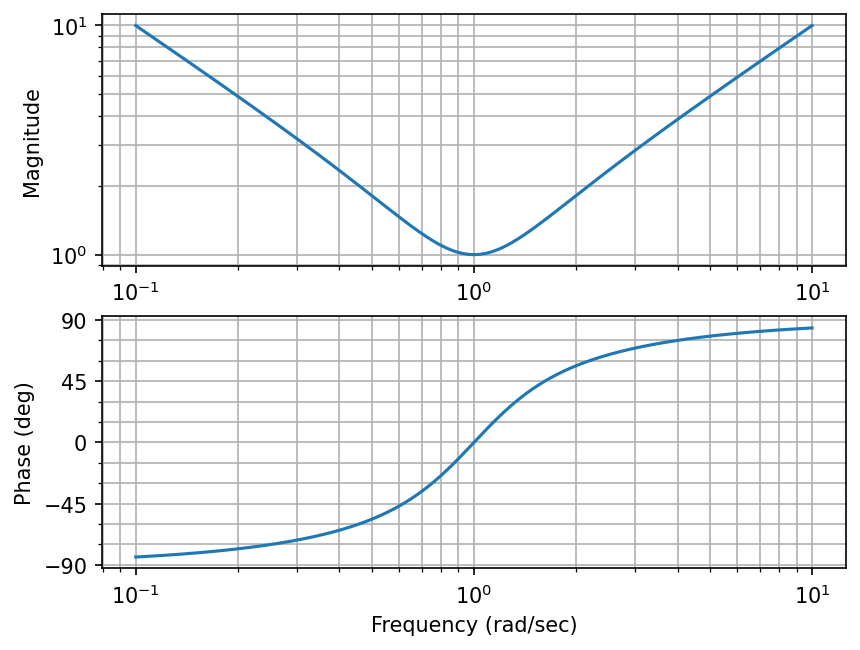

In [16]:
control.bode_plot(G)
plt.savefig('bode2.png')

In [17]:
omega = numpy.logspace(-2, 1)
s = 1j*omega
G = 2*numpy.exp(-0.3*s)/(s + 1)
Gc = (1 + 1/(10*s))

In [18]:
def bode(G):
    fig, (axgain, axphase) = plt.subplots(2, 1, sharex=True)
    axgain.loglog(omega, numpy.abs(G))
    axphase.semilogx(omega, numpy.degrees(numpy.unwrap(numpy.angle(G))))
    axgain.grid()
    axgain.set_ylabel(r'$AR_{OL}$')
    axphase.grid()
    axphase.set_xlabel(r'$\omega$')
    axphase.set_yticks(numpy.arange(-180-45, 0, 45))
    axphase.set_ylabel(r'$\phi_{OL}$ (deg)')
    
    return axgain, axphase

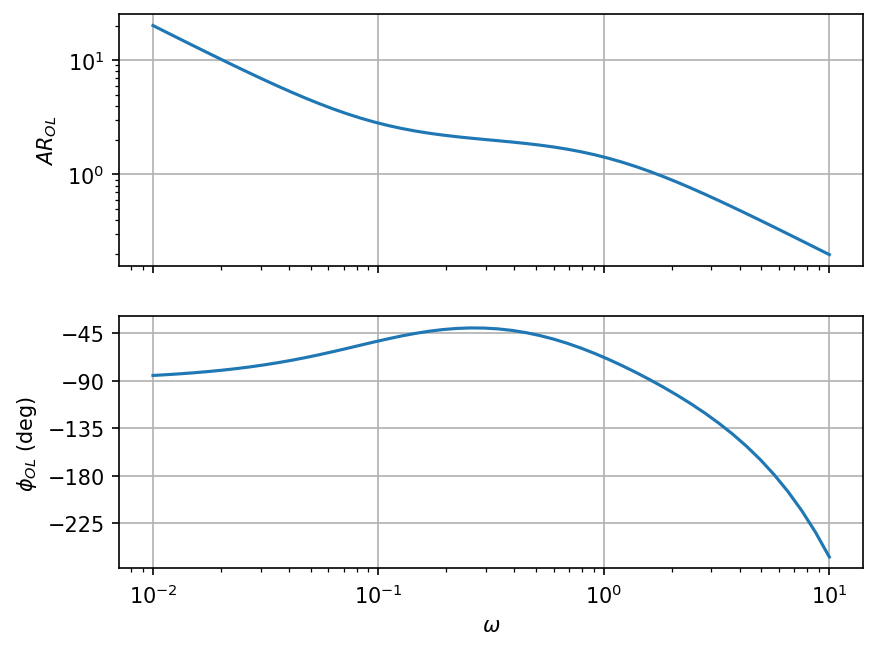

In [19]:
axgain, axphase = bode(G*Gc)
plt.savefig('bode3.png')

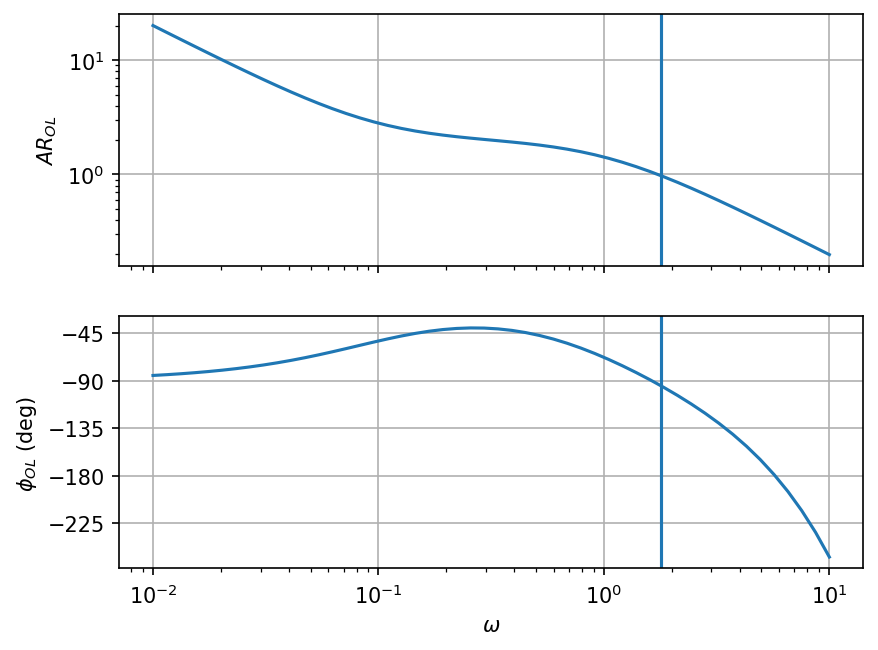

In [20]:
axgain, axphase = bode(G*Gc)
axgain.axvline(1.8)
axphase.axvline(1.8)

In [21]:
omega = numpy.logspace(-2, 1, 1000)

In [22]:
s = 1j*omega

In [23]:
def G(s):
    return (s - 1)*numpy.exp(-2*s)/((s + 1)*(2*s + 1)*(3*s + 1))

In [24]:
Kc = 1
taui = 11

In [25]:
def Gc(s):
    return Kc*(1 + 1/taui/s)

(<Axes: ylabel='$AR_{OL}$'>,
 <Axes: xlabel='$\\omega$', ylabel='$\\phi_{OL}$ (deg)'>)

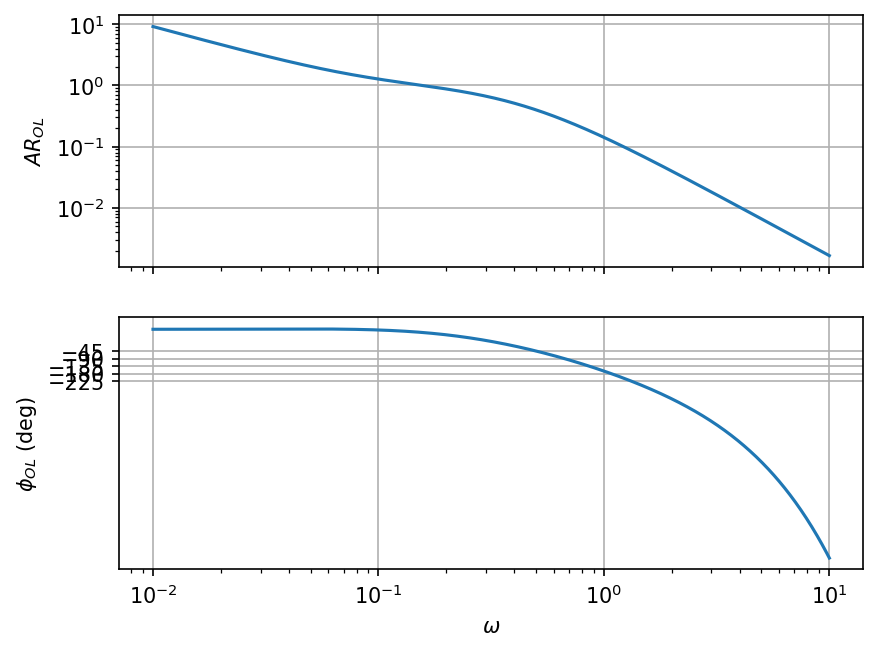

In [26]:
bode(G(s)*Gc(s))